In [ ]:
!pip install pycocotools numpy==1.16.0 opencv-python tqdm tensorboard tensorboardX pyyaml webcolors matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 78.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of opencv-python to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of opencv-python to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.2/89.2 MB 23.4 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × pip subprocess to install build dependencies did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Installing build dependencies ... error
error: subprocess-exited-with-error

× pip subprocess to install build dependencies did not run successfully.
│ exit code: 1
╰─> See above for output.

note: This error originates from a subprocess, a

In [ ]:
import os
import sys
if "projects" not in os.getcwd():
  !git clone --depth 1 https://github.com/zylo117/Yet-Another-EfficientDet-Pytorch
  os.chdir('Yet-Another-EfficientDet-Pytorch')
  sys.path.append('.')
else:
  !git pull

# download and unzip dataset
! mkdir datasets
! wget https://github.com/zylo117/Yet-Another-EfficientDet-Pytorch/releases/download/1.1/dataset_birdview_vehicles.zip
! unzip -d datasets/ dataset_birdview_vehicles.zip

# download pretrained weights
! mkdir weights
! wget https://github.com/zylo117/Yet-Another-EfficientDet-Pytorch/releases/download/1.0/efficientdet-d0.pth -O weights/efficientdet-d0.pth

# prepare project file projects/logo.yml
# showing its contents here
! cat projects/birdview_vehicles.yml

Cloning into 'Yet-Another-EfficientDet-Pytorch'...
remote: Enumerating objects: 47, done.
remote: Counting objects: 100% (47/47), done.
remote: Compressing objects: 100% (44/44), done.
remote: Total 47 (delta 3), reused 24 (delta 1), pack-reused 0 (from 0)
Receiving objects: 100% (47/47), 5.66 MiB | 8.38 MiB/s, done.
Resolving deltas: 100% (3/3), done.
--2024-09-20 06:22:14--  https://github.com/zylo117/Yet-Another-EfficientDet-Pytorch/releases/download/1.1/dataset_birdview_vehicles.zip
Resolving github.com (github.com)... 20.205.243.166
Connecting to github.com (github.com)|20.205.243.166|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://objects.githubusercontent.com/github-production-release-asset-2e65be/253385242/b7ddc400-42da-11eb-8185-7b1008e7bd49?X-Amz-Algorithm=AWS4-HMAC-SHA256&X-Amz-Credential=releaseassetproduction%2F20240920%2Fus-east-1%2Fs3%2Faws4_request&X-Amz-Date=20240920T062214Z&X-Amz-Expires=300&X-Amz-Signature=038a568bf557e3fec701cb

In [ ]:
!pip install tensorboardX

  Using cached tensorboardX-2.6.2.2-py2.py3-none-any.whl.metadata (5.8 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 7.6 MB/s eta 0:00:00


In [ ]:
%cd /content/Yet-Another-EfficientDet-Pytorch

/content/Yet-Another-EfficientDet-Pytorch


In [ ]:
!pwd

/content/Yet-Another-EfficientDet-Pytorch


In [ ]:
! python train.py -c 0 -p birdview_vehicles --head_only True --lr 5e-3 --batch_size 32 --load_weights weights/efficientdet-d0.pth  --num_epochs 10 --save_interval 100

loading annotations into memory...
Done (t=0.16s)
creating index...
index created!
loading annotations into memory...
Done (t=0.02s)
creating index...
index created!
/content/Yet-Another-EfficientDet-Pytorch/train.py:139: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the load

In [ ]:
! python train.py -c 0 -p birdview_vehicles --head_only False --lr 1e-3 --batch_size 16 --load_weights last  --num_epochs 16 --save_interval 100

loading annotations into memory...
Done (t=0.17s)
creating index...
index created!
loading annotations into memory...
Done (t=0.02s)
creating index...
index created!
using weights logs//birdview_vehicles/efficientdet-d0_8_300.pth
/content/Yet-Another-EfficientDet-Pytorch/train.py:139: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True

In [ ]:
#get latest weight file
%cd logs/birdview_vehicles
weight_file = !ls -Art | grep efficientdet
%cd ../..

# _49_1400
weight_file[-1] = 'efficientdet-d0_14_1000.pth'

output = ! python coco_eval.py -c 0 -p birdview_vehicles -w "logs/birdview_vehicles/{weight_file[-1]}"

/content/Yet-Another-EfficientDet-Pytorch/logs/birdview_vehicles
/content/Yet-Another-EfficientDet-Pytorch


In [ ]:
output

['running coco-style evaluation on project birdview_vehicles, weights logs/birdview_vehicles/efficientdet-d0_14_1000.pth...',
 'loading annotations into memory...',
 'Done (t=0.02s)',
 'creating index...',
 'index created!',
 "/content/Yet-Another-EfficientDet-Pytorch/coco_eval.py:149: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=Tru

<ipython-input-35-aa24333531fb>:44: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('logs/birdview_vehicles/'+weight_file[-1]))


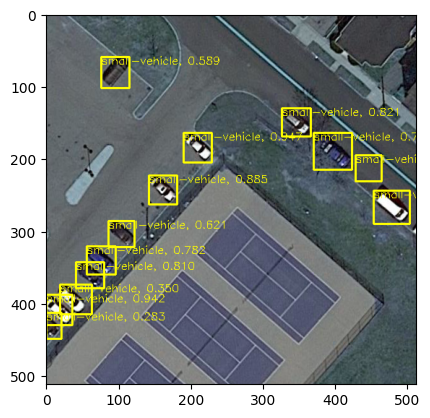

In [ ]:
import torch
from torch.backends import cudnn

from backbone import EfficientDetBackbone
import cv2
import matplotlib.pyplot as plt
import numpy as np

from efficientdet.utils import BBoxTransform, ClipBoxes
from utils.utils import preprocess, invert_affine, postprocess

compound_coef = 0
force_input_size = None  # set None to use default size
img_path = 'datasets/birdview_vehicles/val/1135.jpg'

threshold = 0.2
iou_threshold = 0.2

use_cuda = True
use_float16 = False
cudnn.fastest = True
cudnn.benchmark = True

obj_list = [ 'large-vehicle', 'small-vehicle' ]

# tf bilinear interpolation is different from any other's, just make do
input_sizes = [512, 640, 768, 896, 1024, 1280, 1280, 1536]
input_size = input_sizes[compound_coef] if force_input_size is None else force_input_size
ori_imgs, framed_imgs, framed_metas = preprocess(img_path, max_size=input_size)

if use_cuda:
    x = torch.stack([torch.from_numpy(fi).cuda() for fi in framed_imgs], 0)
else:
    x = torch.stack([torch.from_numpy(fi) for fi in framed_imgs], 0)

x = x.to(torch.float32 if not use_float16 else torch.float16).permute(0, 3, 1, 2)

model = EfficientDetBackbone(compound_coef=compound_coef, num_classes=len(obj_list),

                             # config
                             ratios=[(0.7, 1.4), (1.0, 1.0), (1.5, 0.7)],
                             scales=[2 ** 0, 2 ** (1.0 / 3.0), 2 ** (2.0 / 3.0)])

model.load_state_dict(torch.load('logs/birdview_vehicles/'+weight_file[-1]))
model.requires_grad_(False)
model.eval()

if use_cuda:
    model = model.cuda()
if use_float16:
    model = model.half()

with torch.no_grad():
    features, regression, classification, anchors = model(x)

    regressBoxes = BBoxTransform()
    clipBoxes = ClipBoxes()

    out = postprocess(x,
                      anchors, regression, classification,
                      regressBoxes, clipBoxes,
                      threshold, iou_threshold)

out = invert_affine(framed_metas, out)

for i in range(len(ori_imgs)):
    if len(out[i]['rois']) == 0:
        continue
    ori_imgs[i] = ori_imgs[i].copy()
    for j in range(len(out[i]['rois'])):
        (x1, y1, x2, y2) = out[i]['rois'][j].astype(int)
        cv2.rectangle(ori_imgs[i], (x1, y1), (x2, y2), (255, 255, 0), 2)
        obj = obj_list[out[i]['class_ids'][j]]
        score = float(out[i]['scores'][j])

        cv2.putText(ori_imgs[i], '{}, {:.3f}'.format(obj, score),
                    (x1, y1 + 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5,
                    (255, 255, 0), 1)

        plt.imshow(ori_imgs[i])

In [ ]:
!python train.py -h

usage: Yet Another EfficientDet Pytorch: SOTA object detection network - Zylo117
       [-h] [-p PROJECT] [-c COMPOUND_COEF] [-n NUM_WORKERS] [--batch_size BATCH_SIZE]
       [--head_only HEAD_ONLY] [--lr LR] [--optim OPTIM] [--num_epochs NUM_EPOCHS]
       [--val_interval VAL_INTERVAL] [--save_interval SAVE_INTERVAL] [--es_min_delta ES_MIN_DELTA]
       [--es_patience ES_PATIENCE] [--data_path DATA_PATH] [--log_path LOG_PATH] [-w LOAD_WEIGHTS]
       [--saved_path SAVED_PATH] [--debug DEBUG]

options:
  -h, --help            show this help message and exit
  -p PROJECT, --project PROJECT
                        project file that contains parameters
  -c COMPOUND_COEF, --compound_coef COMPOUND_COEF
                        coefficients of efficientdet
  -n NUM_WORKERS, --num_workers NUM_WORKERS
                        num_workers of dataloader
  --batch_size BATCH_SIZE
                        The number of images per batch among all devices
  --head_only HEAD_ONLY
                      